In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("csgo_players.csv")
data.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


In [12]:
features = ["kills_per_death", 'sniper_kills', 'opening_kill_ratio', 'deaths_per_round', 'rating']
df = data[features]

In [13]:
from matplotlib import pyplot as plt

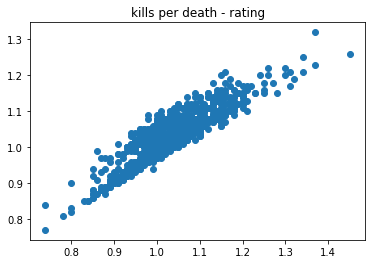

In [14]:
plt.title('kills per death - rating')
plt.scatter(df['kills_per_death'], df['rating'])
plt.show()

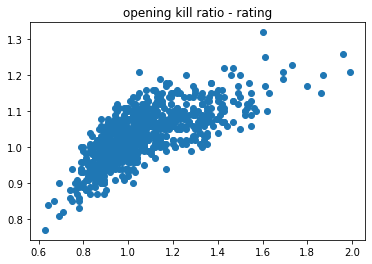

In [15]:
plt.title('opening kill ratio - rating')
plt.scatter(df['opening_kill_ratio'], df['rating'])
plt.show()

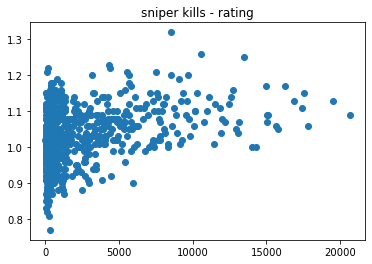

In [16]:
plt.title('sniper kills - rating')
plt.scatter(df['sniper_kills'], df['rating'])
plt.show()

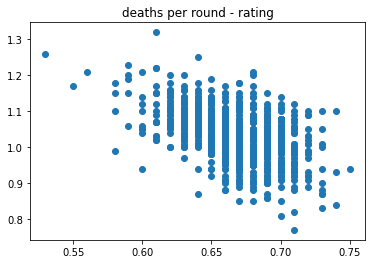

In [19]:
plt.title('deaths per round - rating')
plt.scatter(df['deaths_per_round'], df['rating'])
plt.show()

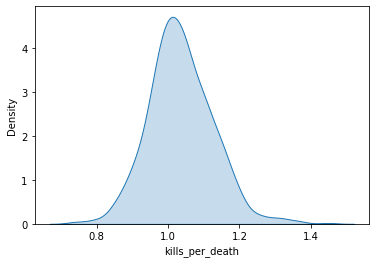

In [20]:
import seaborn as sns
sns.kdeplot(df["kills_per_death"], shade=True)
plt.show()

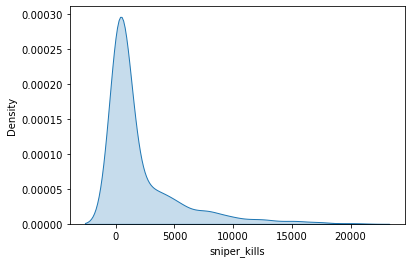

In [21]:
import seaborn as sns
sns.kdeplot(df["sniper_kills"], shade=True)
plt.show()

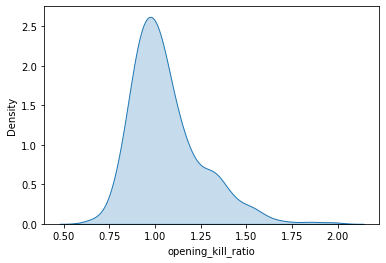

In [22]:
import seaborn as sns
sns.kdeplot(df["opening_kill_ratio"], shade=True)
plt.show()

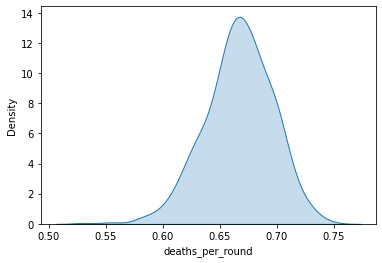

In [24]:
sns.kdeplot(df['deaths_per_round'], shade=True)
plt.show()

In [25]:
X= df[['kills_per_death', 'sniper_kills', 'opening_kill_ratio', 'deaths_per_round']]
y= df['rating']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.head()

,kills_per_death,sniper_kills,opening_kill_ratio,deaths_per_round
757,0.91,49,0.81,0.67
33,1.16,1047,1.17,0.67
349,1.03,503,0.91,0.68
657,0.97,213,0.93,0.66
523,0.98,288,0.88,0.71


### Linear Regression

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [ 8.77174107e-01 -2.05420395e-06 -1.26273737e-02  5.14478019e-01]
lr.intercept_: -0.1999186755800264


##### We can see only the coefficient of "kills_per_death" makes sense. The last three coefficients are all problematic.

In [47]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.842728
test set score: 0.848369


### Lasso Regression

In [50]:
from sklearn.linear_model import Lasso

In [51]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    print(f'alpha = {a}')
    print("lr.coef_: %s" % lasso.coef_)
    print("lr.intercept_: %s" % lasso.intercept_)
    print("training set score: %f" % lasso.score(X_train, y_train))
    print("test set score: %f" % lasso.score(X_test, y_test))
    print('-----------------')

alpha = 1e-05
lr.coef_: [ 8.66988985e-01 -2.12057201e-06 -1.00193148e-02  4.90335089e-01]
lr.intercept_: -0.17590411698921882
training set score: 0.842657
test set score: 0.847509
-----------------
alpha = 0.0001
lr.coef_: [ 7.92573044e-01 -2.46232793e-06 -0.00000000e+00  2.61896159e-01]
lr.intercept_: 0.04348584745320194
training set score: 0.836190
test set score: 0.835364
-----------------
alpha = 0.001
lr.coef_: [ 5.57501865e-01 -1.65117715e-06  3.06357785e-02  0.00000000e+00]
lr.intercept_: 0.42742462457059593
training set score: 0.784724
test set score: 0.773957
-----------------
alpha = 0.01
lr.coef_: [ 0.00000000e+00  6.80409434e-06  0.00000000e+00 -0.00000000e+00]
lr.intercept_: 1.0199633437460955
training set score: 0.103072
test set score: 0.105871
-----------------
alpha = 0.1
lr.coef_: [ 0.00000000e+00  6.79632619e-06  0.00000000e+00 -0.00000000e+00]
lr.intercept_: 1.019979514204615
training set score: 0.103071
test set score: 0.105852
-----------------
alpha = 1
lr.coef_:

### Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    print(f'alpha = {a}')
    print("lr.coef_: %s" % ridge.coef_)
    print("lr.intercept_: %s" % ridge.intercept_)
    print("training set score: %f" % ridge.score(X_train, y_train))
    print("test set score: %f" % ridge.score(X_test, y_test))
    print('-----------------')

alpha = 0.0001
lr.coef_: [ 8.77067709e-01 -2.05469588e-06 -1.26048734e-02  5.14229832e-01]
lr.intercept_: -0.19966588638348814
training set score: 0.842728
test set score: 0.848360
-----------------
alpha = 0.001
lr.coef_: [ 8.76112105e-01 -2.05911604e-06 -1.24022393e-02  5.12005596e-01]
lr.intercept_: -0.19739927001958701
training set score: 0.842728
test set score: 0.848283
-----------------
alpha = 0.01
lr.coef_: [ 8.66745622e-01 -2.10262003e-06 -1.03644775e-02  4.90660304e-01]
lr.intercept_: -0.1755406430320059
training set score: 0.842658
test set score: 0.847473
-----------------
alpha = 0.1
lr.coef_: [ 7.87845243e-01 -2.47823409e-06  1.00927154e-02  3.40491411e-01]
lr.intercept_: -0.01461685967418802
training set score: 0.838344
test set score: 0.837842
-----------------
alpha = 1
lr.coef_: [ 4.63461843e-01 -3.78862278e-06  1.22401618e-01  5.45859725e-02]
lr.intercept_: 0.3958467915990027
training set score: 0.774856
test set score: 0.762076
-----------------
alpha = 10
lr.coef_